In [1]:
import rebound
import numpy as np

In [2]:
sim = rebound.Simulation()
sim.G = 1.4880826e-34
sim.integrator = "whfast"

In [3]:
r0=np.array([[3.256101656448802E-03  , -1.951205394420489E-04 , -1.478264728548705E-04],
     [-1.927589645545195E-01 , 2.588788361485397E-01  , 3.900432597062033E-02 ],
     [-5.976537074581466E-01 , 3.918678996109574E-01  , 3.990356741282203E-02 ],
     [-7.986189029000561E-01 , -6.086873314992410E-01 , -1.250824315650566E-04],
     [7.897942807177173E-01  , 1.266671734964037E+00  , 7.092292179885432E-03 ],
     [-4.314503046344270E+00 , 3.168094294126697E+00  , 8.331048545353310E-02 ],
     [-4.882304833383455E+00 , -8.689263067189865E+00 , 3.453930436208210E-01 ],
     [1.917757033372740E+01  , 5.671738750949031E+00  , -2.273858614425555E-01],
     [2.767031517959636E+01  , -1.150331645280942E+01 , -4.008018419157927E-01],
     [7.765250227278298E+00  , -3.190996242617413E+01 , 1.168394015703735E+00 ]])
v0=np.array([[3.039963463108432E-06 ,  6.030576499910942E-06 ,  -7.992931269075703E-08],
     [-2.811550184725887E-02,  -1.586532995282261E-02,  1.282829413699522E-03 ],
     [-1.113090630745269E-02,  -1.703310700277280E-02,  4.089082927733997E-04 ],
     [1.012305635253317E-02 ,  -1.376389620972473E-02,  3.482505080431706E-07 ],
     [-1.135279609707971E-02,  8.579013475676980E-03 ,  4.582774369441005E-04 ],
     [-4.555986691913995E-03,  -5.727124269621595E-03,  1.257262404884127E-04 ],
     [4.559352462922572E-03 ,  -2.748632232963112E-03,  -1.337915989241807E-04],
     [-1.144087185031310E-03,  3.588282323722787E-03 ,  2.829006644043203E-05 ],
     [1.183702780101068E-03 ,  2.917115980784960E-03 ,  -8.714411604869349E-05],
     [3.112825364672655E-03 ,  1.004673400082409E-04 ,  -9.111652976208292E-04]])
m = np.array([
     1.988544e30,
     3.302e23,
     48.685e23,
     6.0477246e24,
     6.4185e23,
     1898.13e24,
     5.68319e26,
     86.8103e24,
     102.41e24,
     1.4639248e+22])

        

In [4]:
for kk in range(len(m)):
    sim.add(m=m[kk],x=r0[kk,0],y=r0[kk,1],z=r0[kk,2],vx=v0[kk,0],vy=v0[kk,1],vz=v0[kk,2])
sim.move_to_com()

In [5]:
tmax = 50*365.24
Nout = 1500
aearth,amars = np.zeros(Nout),np.zeros(Nout)
x,y,z = np.zeros([Nout,len(m)]), np.zeros([Nout,len(m)]), np.zeros([Nout,len(m)])
vx,vy,vz = np.zeros([Nout,len(m)]), np.zeros([Nout,len(m)]), np.zeros([Nout,len(m)])
times = np.linspace(0.,tmax,Nout)

for i,time in enumerate(times):
    sim.integrate(time)
    for kk in range(len(m)):
        x[i,kk], y[i,kk], z[i,kk] = sim.particles[kk].x, sim.particles[kk].y,  sim.particles[kk].z
        vx[i,kk], vy[i,kk], vz[i,kk] = sim.particles[kk].vx, sim.particles[kk].vy,  sim.particles[kk].vz
        aearth[i], amars[i] = sim.particles[3].a, sim.particles[4].a

In [6]:
import matplotlib.pyplot as plt

(-5.96362686601736, 5.476901562122164, -5.781660863453191, 5.6497931946780025)

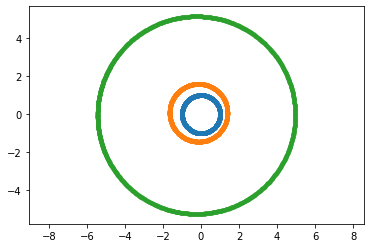

In [17]:
plt.plot(x[::1,3],y[::1,3],'.')
plt.plot(x[::1,4],y[::1,4],'.')
plt.plot(x[::1,5],y[::1,5],'.')
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.axis('equal')


In [12]:
xrel,yrel, zrel = x-x[:,3][:,None], y-y[:,3][:,None], z-z[:,3][:,None]

(-7.0661589618634535, 6.575058233316465, -6.81411203592528, 6.766605703403601)

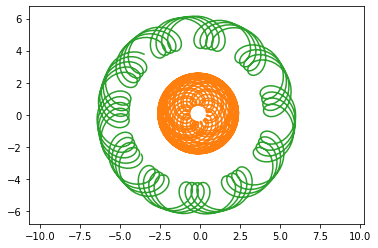

In [18]:
plt.plot(xrel[::1,3],yrel[::1,3])
plt.plot(xrel[::1,4],yrel[::1,4])
plt.plot(xrel[::1,5],yrel[::1,5])
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.axis('equal')